In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Loading the data

In [5]:
df = pd.read_csv("METR-LA.csv")

### Print the data

In [6]:

df.head()

,Time,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
0,3/1/2012 0:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
1,3/1/2012 0:05,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2,3/1/2012 0:10,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
3,3/1/2012 0:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
4,3/1/2012 0:20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [7]:

df.columns

Index(['Time', '773869', '767541', '767542', '717447', '717446', '717445',
       '773062', '767620', '737529',
       ...
       '772167', '769372', '774204', '769806', '717590', '717592', '717595',
       '772168', '718141', '769373'],
      dtype='object', length=208)

In [8]:
sensor_data = df[["717447"]].copy()
df["Time"] = pd.to_datetime(df["Time"])
sensor_data.columns = ["Speed"]

In [9]:
sensor_data.head()

,Speed
0,61.500000
1,62.444444
2,59.000000
3,0.000000
4,0.000000


In [10]:
def convert_to_table(df, window_size=6):
    X, y = [], []
    speeds = df["Speed"].values
    for i in range(window_size, len(speeds)):
        X.append(speeds[i-window_size:i])
        y.append(speeds[i])
    return np.array(X), np.array(y)    

In [11]:
window_size = 6
X, y = convert_to_table(sensor_data, window_size)

print("Feature shape:", X.shape, "Feature type:", type(X))
print("Label shape:", y.shape, "Label type:", type(y))

Feature shape: (34266, 6) Feature type: <class 'numpy.ndarray'>
Label shape: (34266,) Label type: <class 'numpy.ndarray'>


In [12]:
m = X.shape[0]
train_end = int(m * 0.7)
val_end = int(m * 0.85)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

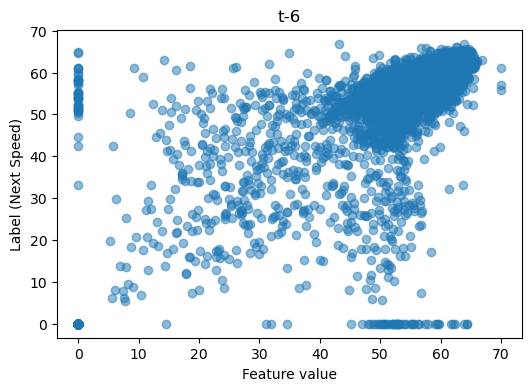

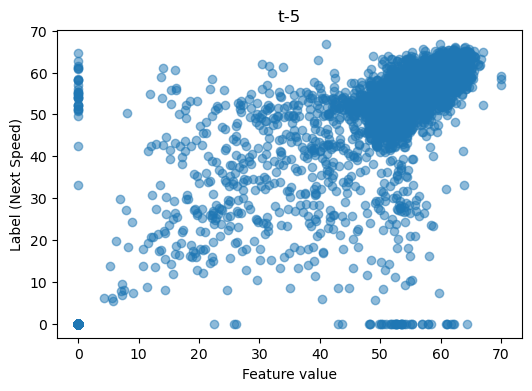

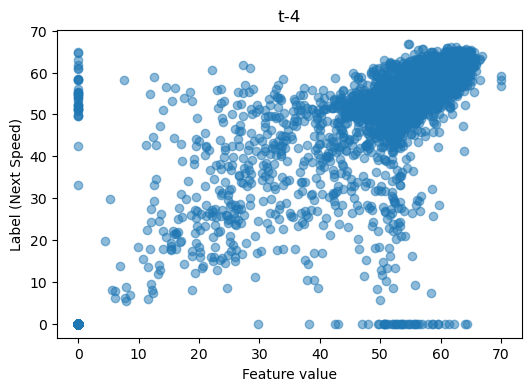

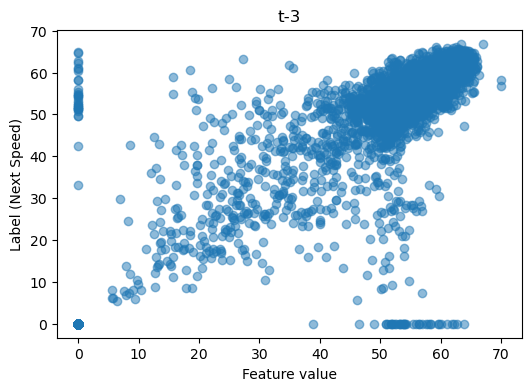

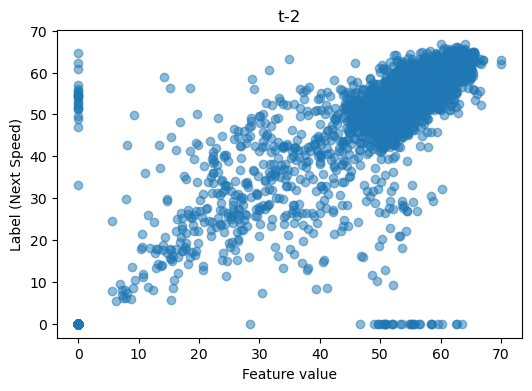

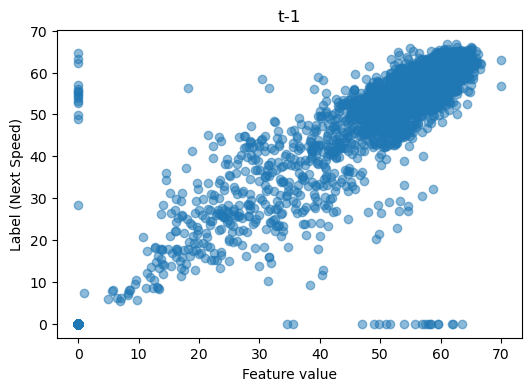

In [13]:
from utils import plot_features_vs_label


feature_names = [f"t-{window_size-i}" for i in range(window_size)]

plot_features_vs_label(X_train, y_train, feature_names=feature_names, sample_size=5000)


In [14]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[70. 70. 70. 70. 70. 70.]
Peak to Peak range by column in Normalized X:[4.63078601 4.63082936 4.63089103 4.63092145 4.63197904 4.63303884]


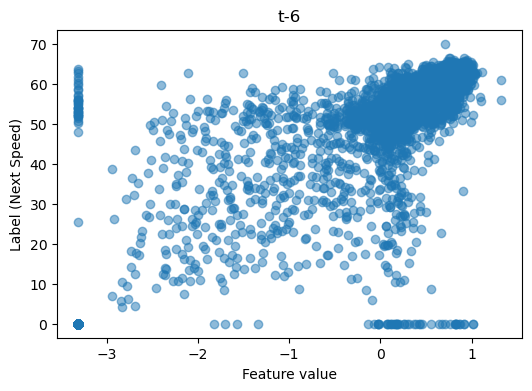

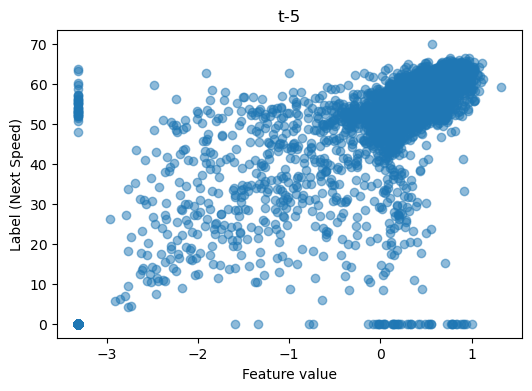

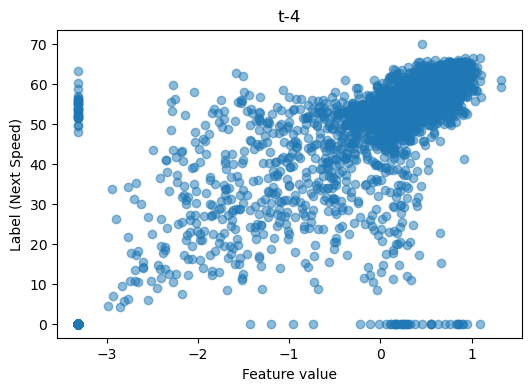

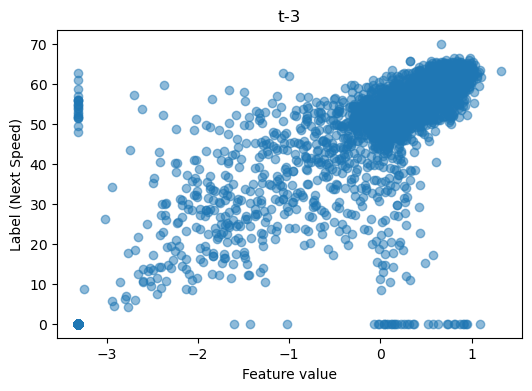

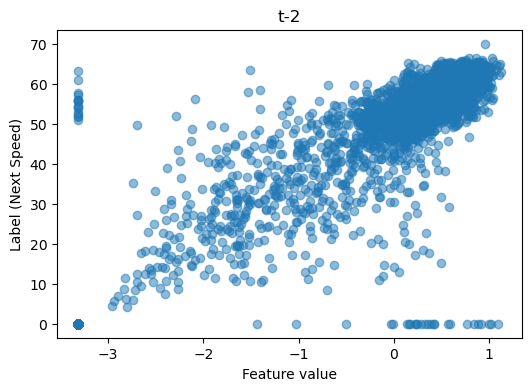

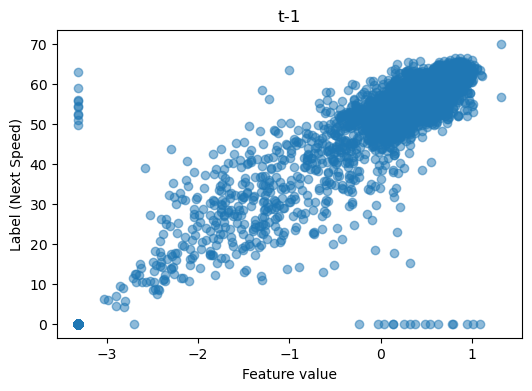

In [15]:
feature_names = [f"t-{window_size-i}" for i in range(window_size)]

plot_features_vs_label(X_norm, y_train, feature_names=feature_names, sample_size=5000)

In [16]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 24, number of weight updates: 575665.0


In [17]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [ 0.51057186 -0.03095713  0.6673207   0.67833334  1.36298619 11.06626096], b:[50.05513774]


In [18]:
y_pred = sgdr.predict(X_val_norm)

print(f"Prediction on evaluation set:\n{y_pred[:4]}" )
print(f"Target values \n{y_val[:4]}")

Prediction on evaluation set:
[41.80103532 35.30710502 35.94492383 39.0035542 ]
Target values 
[28.25  31.125 36.75  35.25 ]


In [17]:
mae = mean_absolute_error(y_val, y_pred)
print(f"MAE: {mae:.3f}")

MAE: 3.447


In [20]:
r2 = r2_score(y_val, y_pred)
print(f"R²: {r2:.3f}")


R²: 0.851


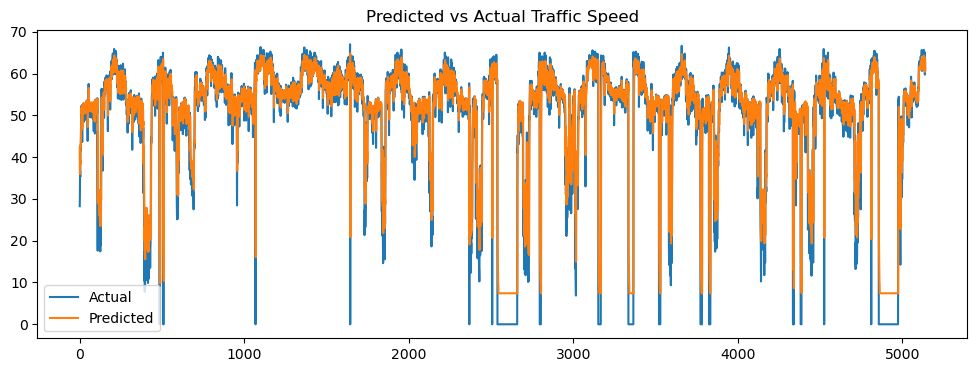

In [19]:

plt.figure(figsize=(12,4))
plt.plot(y_val, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()


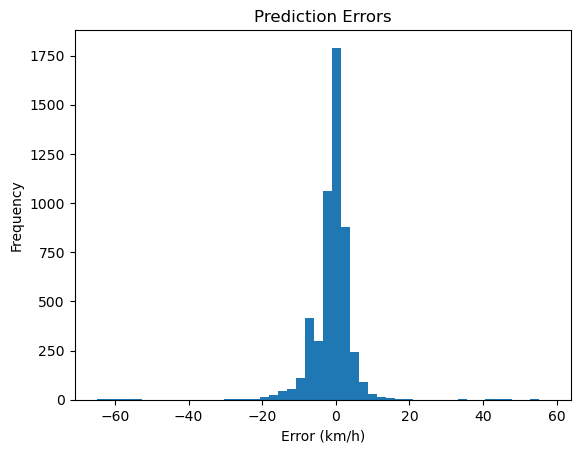

In [20]:
errors = y_val - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()


In [21]:
y_pred = sgdr.predict(X_test_norm)
print(f"Prediction on test set:\n{y_pred[:4]}" )
print(f"Target values \n{y_test[:4]}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

Prediction on test set:
[61.10609398 61.12670766 62.37440111 63.73659161]
Target values 
[61.5        63.22222222 65.625      63.11111111]
MAE: 4.149
R²: 0.856


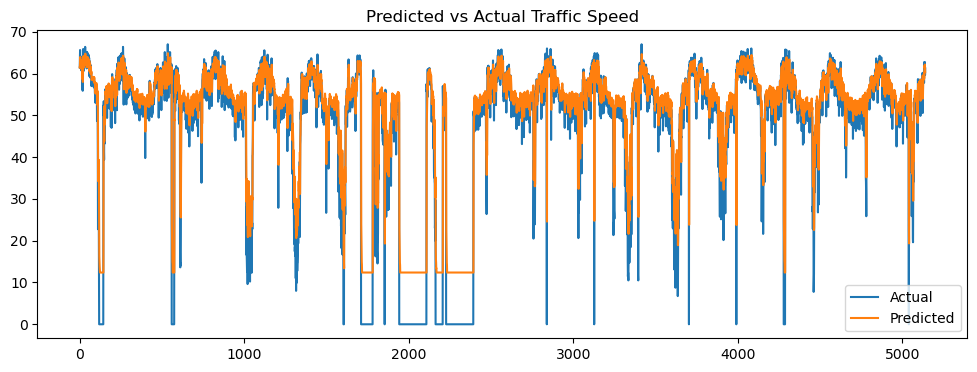

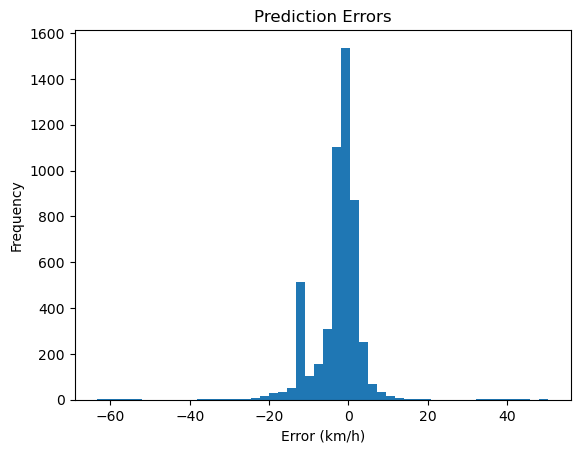

In [22]:

plt.figure(figsize=(12,4))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()

errors = y_test - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()


### Adding the delta as a feature

In [49]:
sensor_data["delta_1"] = sensor_data["Speed"].diff(1)

sensor_data= sensor_data.dropna().reset_index(drop=True)

sensor_data.head()

,Speed,delta_1
0,0.000000,-59.000000
1,0.000000,0.000000
2,61.666667,61.666667
3,62.375000,0.708333
4,60.500000,-1.875000


In [50]:
def convert_to_table_with_extra_features(df, window_size=6):
    X, y = [], []
    speeds = df["Speed"].values
    delta_1 = df["delta_1"].values

    for i in range(window_size, len(speeds)):
        features = []

        features.extend(speeds[i-window_size:i])

        features.append(delta_1[i-1])


        X.append(features)
        y.append(speeds[i])

    return np.array(X), np.array(y)



In [53]:
window_size = 6
X_fe, y = convert_to_table_with_extra_features(sensor_data, window_size)

print("Feature shape:", X_fe.shape, "Feature type:", type(X_fe))
print("Label shape:", y.shape, "Label type:", type(y))

Feature shape: (34263, 7) Feature type: <class 'numpy.ndarray'>
Label shape: (34263,) Label type: <class 'numpy.ndarray'>


In [56]:
m_fe = X_fe.shape[0]
train_fe_end = int(m_fe * 0.7)
val_fe_end = int(m_fe * 0.85)

X_fe_train, y_fe_train = X_fe[:train_fe_end], y[:train_fe_end]
X_fe_val, y_fe_val = X_fe[train_fe_end:val_fe_end], y[train_fe_end:val_fe_end]
X_fe_test, y_fe_test = X_fe[val_fe_end:], y[val_fe_end:]

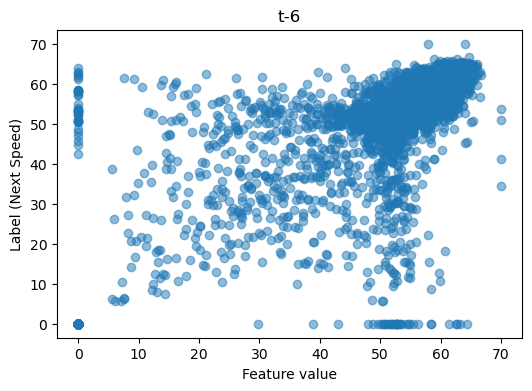

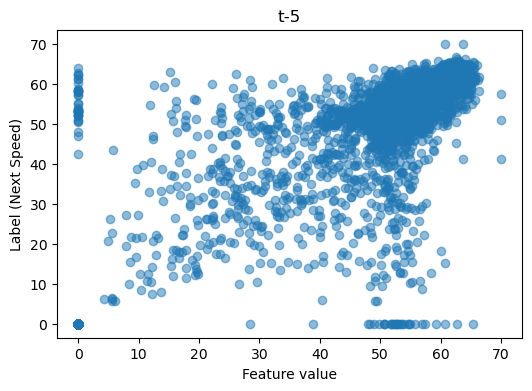

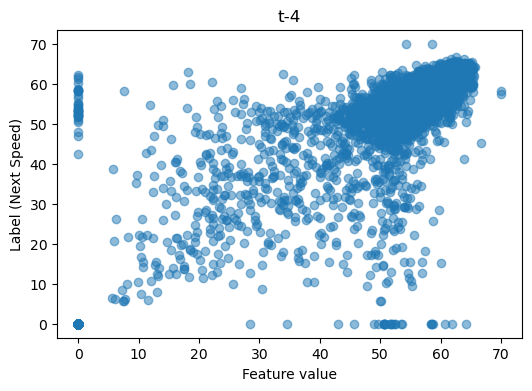

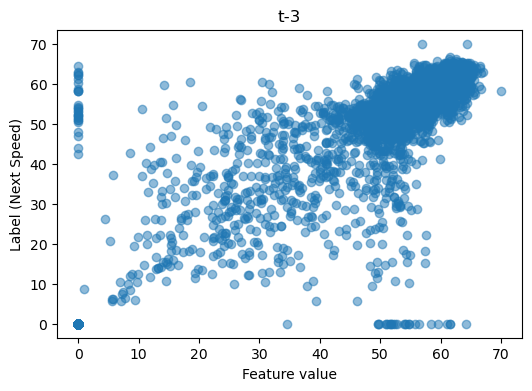

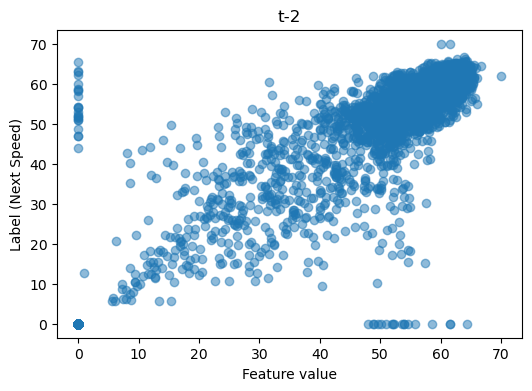

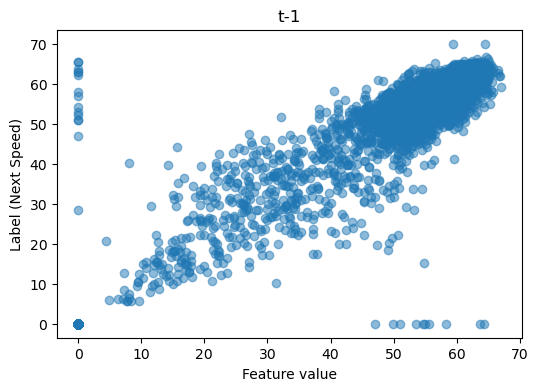

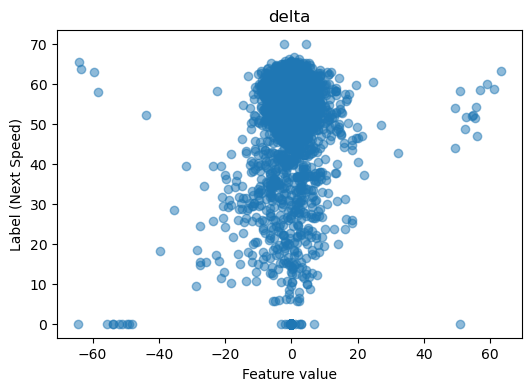

In [57]:
window_size = 6
feature_names = [f"t-{window_size-i}" for i in range(window_size)]
feature_names.append('delta')
plot_features_vs_label(X_fe_train, y_fe_train, feature_names=feature_names, sample_size=5000)


In [58]:
scaler = StandardScaler()
X_fe_norm = scaler.fit_transform(X_fe_train)
X_fe_val_norm = scaler.fit_transform(X_fe_val)
X_fe_test_norm = scaler.fit_transform(X_fe_test)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_fe_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_fe_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[ 70.  70.  70.  70.  70.  70. 132.]
Peak to Peak range by column in Normalized X:[ 4.63073484  4.63179085  4.63284746  4.63290283  4.63296675  4.63292784
 21.93157586]


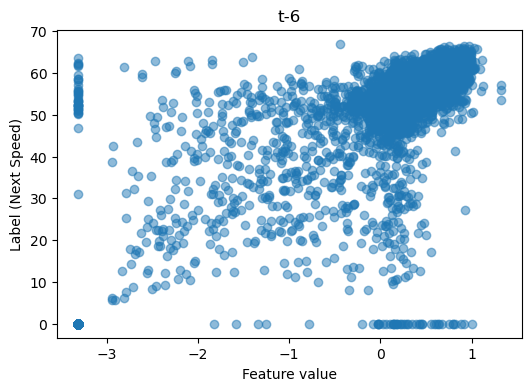

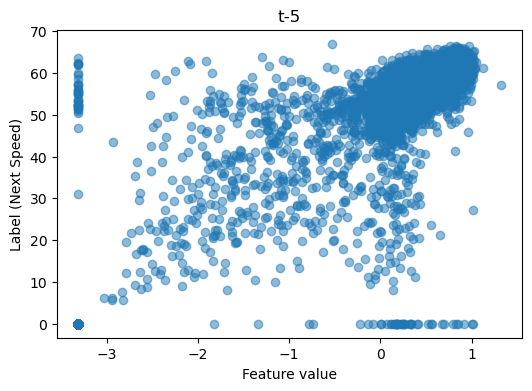

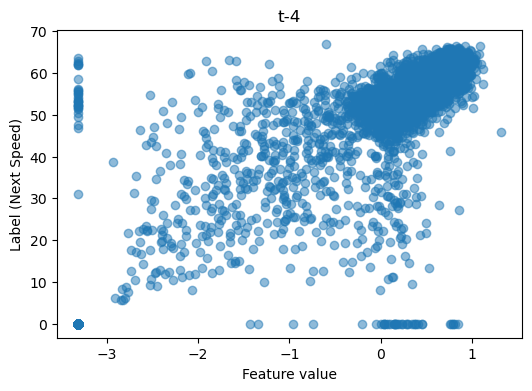

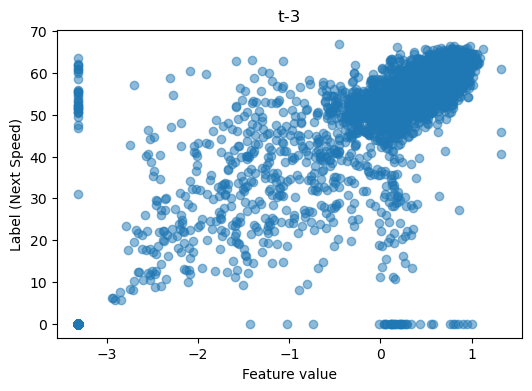

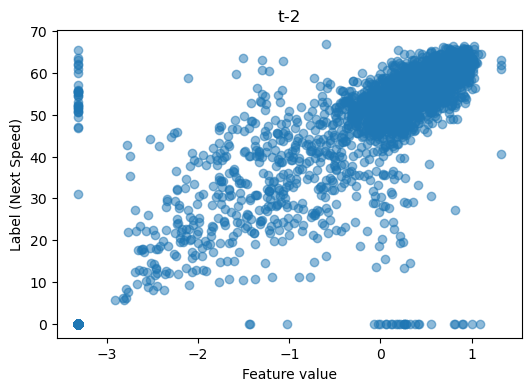

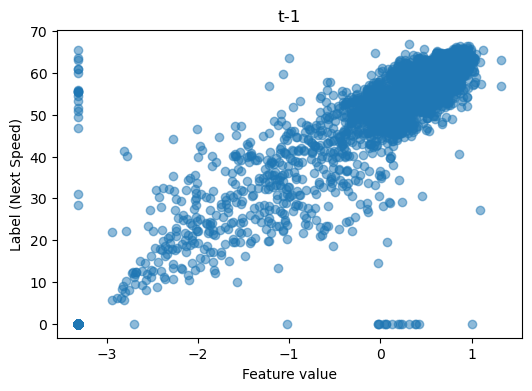

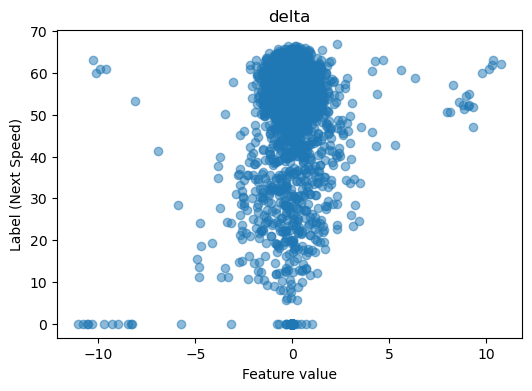

In [59]:
plot_features_vs_label(X_fe_norm, y_fe_train, feature_names=feature_names, sample_size=5000)

In [89]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_fe_norm, y_fe_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 11, number of weight updates: 263825.0


In [90]:
b_fe_norm = sgdr.intercept_
w_fe_norm = sgdr.coef_
print(f"model parameters: w: {w_fe_norm}, b:{b_fe_norm}")

model parameters: w: [0.61478073 0.09431727 0.8415579  0.62951129 5.69382849 6.4994391
 2.02250391], b:[50.04999023]


In [91]:
y_fe_pred = sgdr.predict(X_fe_val_norm)

print(f"Prediction on evaluation set:\n{y_fe_pred[:4]}" )
print(f"Target values \n{y_fe_val[:4]}")

Prediction on evaluation set:
[35.25619165 36.45423909 39.43465489 38.11607067]
Target values 
[31.125 36.75  35.25  42.75 ]


In [92]:

mae = mean_absolute_error(y_fe_val, y_fe_pred)
print(f"MAE: {mae:.3f}")


MAE: 3.442


In [93]:
r2 = r2_score(y_fe_val, y_fe_pred)
print(f"R²: {r2:.3f}")

R²: 0.851


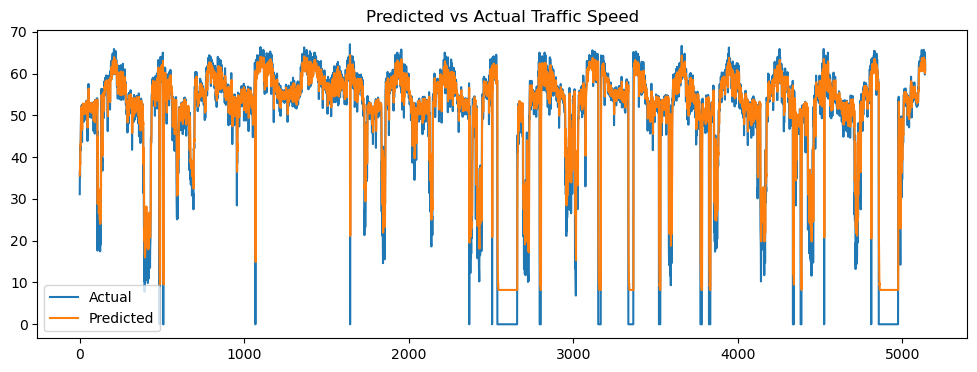

In [69]:
plt.figure(figsize=(12,4))
plt.plot(y_fe_val, label="Actual")
plt.plot(y_fe_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()

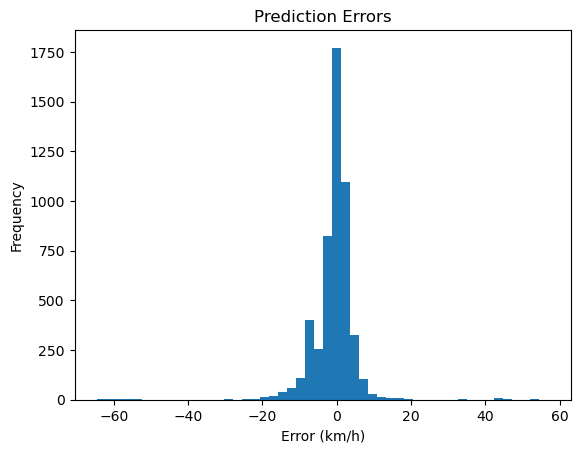

In [71]:
errors = y_fe_val - y_fe_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()

In [94]:
y_fe_pred = sgdr.predict(X_fe_test_norm)
print(f"Prediction on test set:\n{y_fe_pred[:4]}" )
print(f"Target values \n{y_fe_train[:4]}")

mae = mean_absolute_error(y_fe_test, y_fe_pred)
print(f"MAE: {mae:.3f}")

r2 = r2_score(y_fe_test, y_fe_pred)
print(f"R²: {r2:.3f}")


Prediction on test set:
[60.9412255  61.28945142 62.66895455 64.04570209]
Target values 
[58.125      61.11111111 60.         62.25      ]
MAE: 4.172
R²: 0.857


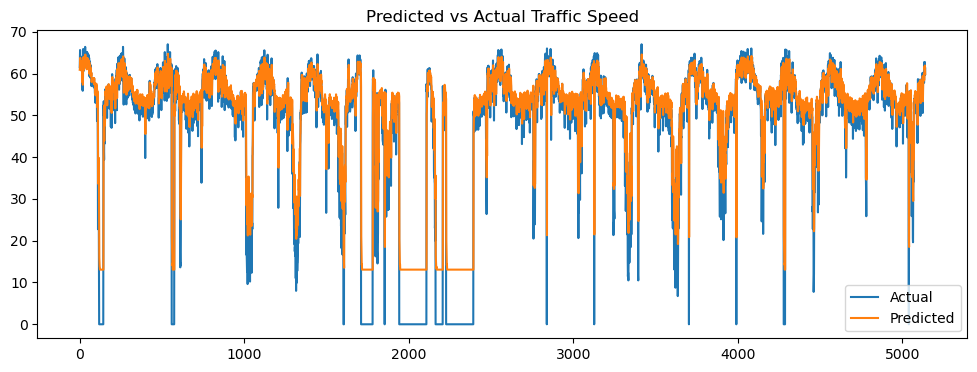

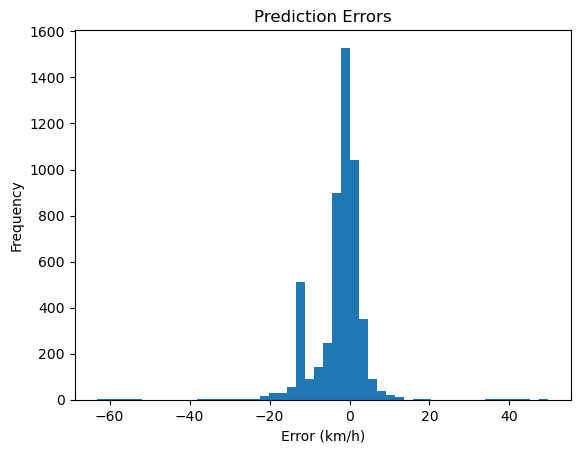

In [73]:
plt.figure(figsize=(12,4))
plt.plot(y_fe_test, label="Actual")
plt.plot(y_fe_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()

errors = y_fe_test - y_fe_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()